# Homework 1


The homework consists of two parts: theoretical part (10 pts) and coding part (20 pts).
 - All theoretical questions must be answered in your own words, do not copy-paste text from the internet.
 - You can get 10 pts for correctly answering theoretical questions; points can be deducted for terrible formatting or incomprehensible English.
 - Coding part gives maximum of 20 pts.
 - There are 5 tasks in theoretical part and 7 tasks in coding part. The tasks are indicated by **Task** followed by the task number.

*Once completed zip the entire directory containing this exercise and upload it to https://courses.cs.ut.ee/2019/nn/spring/Main/Practices.*

For background reading see http://cs231n.github.io/classification/.


## Part 1: Lecture Materials (10 pts)

These questions are about the material covered in the two lectures about "Probability and Information theory" and "Basics of Machine Learning".

### Probability theory

**Task 1.1 (3pts)**
Some guys made a study to find out if intake of vitamin C helps you recover faster from a common cold. They asked 1000 people about their recent illness and if they consumed additional vitamin C. The results are summarized in table below:

|                       -            | Recovered in <3 days | Recovered in 3-5 days | Recovered in >5 days | Total probability of dose |
|------------------------------------|----------------------|-----------------------|----------------------|---------------------------|
| **No vitamin C**                       | 200 participants     | 150 participants      | 150 participants     |              500             |
| **Low dose of vitamin C**              | 80 participants      | 60 participants       | 60 participants      |              200            |
| **High dose of vitamin C**             | 120 participants     | 90 participants       | 90 participants      |              300          |
| **Total probability of recovery time** |         400            |        300              |         300            |1000

Answer the following questions, also include explanation or calculations that led to this answer. (It is probably best if you turn the counts into probabilities first and calculate marginal probabilities)
 1. What proportion of the participants took more than 5 days to recover from illness?
 2. What is the probability to recover in less than 3 days given that you took no vitamin C? (HINT: it is a conditional probability)
 3. What is the probability to recover in less than 3 days given that you took high dose of vitamin C?
 4. Are the two variables (dose and recovery time) independent? Explain your answer.

**Your Answer**: 

1.
Total participants = 1000,
Total participants took more than 5 days = 300,
Proportion = 300/1000 = 30%

2.
Total participants who took no vitamin C = 500,
Recovered less than 3 days = 200,
Probability = 200/500 = 0.4

3.
Total participants who took high dose vitamin C = 300,
Recovered less than 3 days = 120,
Probability = 120/300 = 0.4

4.
Yes both are independent variables, according to the probabilities of q2 and q3, we can say recovery time is not depends on dose at both events. Normally independent variables are uncorrelated.

**Task 1.2 (3pts)** Imagine we have a classifier that classifies an image into one of 4 categories: cars, bicycles, motorbikes and pedestrians. Given an image of a bicycle, it produces the following probabilities for the 4 classes: car 0.05, bicycle 0.70, motorbike 0.20, pedestrian 0.05. Considering that the true probability distribution is $[0,1,0,0]$, find (use base 2 for all the logarithms):
 - The entropy of the true distribution, the predicted distribution and a uniform distribution ($[0.25,0.25,0.25,0.25]$). Which one is the highest?
 - Kullback-Leibler divergence between the true and the predicted distribution. (notice that $KL(p||q)$ is not equal to $KL(q||p)$ )
 - Sum up the entropy of the true distribution and the KL divergence calculated above to get the cross-entropy value. Calculate the cross-entropy also using the formula $CE(p,q) = - \sum_i p_i log_2(q_i).$

**Your Answer**: 
- entropy for true distribution 1.26, entropy for uniform distribution 2.0, so the uniform is higher
- 1.26 / 2 = 0.63
- 1.26 log 2 = 1.26

### Machine Learning

**Task 1.3 (1pt)**
Suppose you have measured a series of pairs of values $y_i$ and $x_i$, for $i=1,\dots,N$, and you would like to establish some relation between the X and Y variables. Assume also that each sample is independent and identically distributed. Show that the maximum likelihood estimator for the Gaussian model of linear regression corresponds to minimizing the mean squared error between the prediction and the true output. Gaussian model assumes that the probability of some target value y given x is the Gaussian distribution $\mathcal{N}(w\cdot x, \sigma^2)$, where w are the weights.

In particular demonstrate that maximizing
$
%\arg \max_\theta 
\log \left(\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y - \hat{y})^2}{2\sigma^2}}\right)
$
is equivalent to minimizing 
$
%= \arg \min_\theta 
(y - \hat{y})^2
$, where $y$ is the target value, $\hat{y}=w\cdot x$ is the predicted value and variance $\sigma^2$ is considered constant.

**Your Answer**: *fill this in.*

**Task 1.4 (1pt)** Imagine you have trained a very powerful neural network to classify if a given image has a dog or a cat on it. The network achieves 99.9% accuracy on the images that it was trained on, but has only 65% accuracy on cat/dog images it has never seen before (test images). How is this problem called? How to make the difference between training and testing error smaller (name at least one solution)?

**Your Answer**: 
- This is called overfitting

Solutions: Least Squared Error Reguralization or Lambda Factor


**Task 1.5: Curse of Dimensionality (2pts)**
Images are very common data type in deep learning. Each colored image consists of pixels, each pixel is a combination of three color values - red,green,blue - that have 256 possible values each.
 - How many different colors can one pixel take?
 - How many different $2\times2$ pixel images are there?
 - In the ImageNet dataset the pictures are of size $256\times256$ pixels. Compare the number of possible images with the number of images in the dataset (1.2 million).

**Your Answer**:
- 256^2
- 256^3 * 2^2
- 1.2 million * 256^5



## Part 2: k-Nearest Neighbor (kNN) exercise (20 pts)

In this assignment you will
 - understand the basic Image Classification pipeline and the data-driven approach (train/predict stages),
 - understand the train/val/test splits and the use of validation data for hyperparameter tuning,
 - develop proficiency in writing efficient vectorized code with numpy,
 - implement and apply a k-Nearest Neighbor (kNN) classifier.

### Requirements

All the required packages should be part of Anaconda already, the only additional install is `future` package:
```
conda install future
```

### Downloading data

Download the CIFAR-10 dataset from http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz and untar it to `../datasets`:
```
tar -xzvf cifar-10-python.tar.gz
```

### kNN

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In [1]:
from __future__ import print_function

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


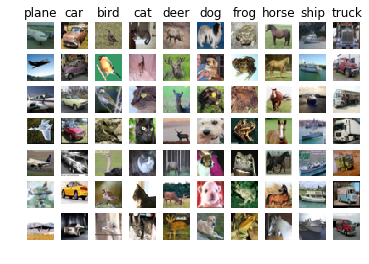

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [7]:
from k_nearest_neighbor import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps: 

1. First we must compute the distances between all test examples and all train examples. 
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element $(i,j)$ is the distance between the $i$-th test and $j$-th train example.

**Task 2.1:** First, open `k_nearest_neighbor.py` and implement the function `compute_distances_two_loops` that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

In [8]:
# Open k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


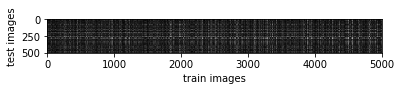

In [9]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.xlabel("train images")
plt.ylabel("test images")
plt.show()

**Task 2.2:** Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

**Your Answer**:
- Either this is an observation from a class which not in the training set, or it is very different from most of the training data. Maybe noise.



**Task 2.3:** Now implement the function `predict_labels` in `k_nearest_neighbor.py` and run the code below:

In [10]:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


You should expect to see approximately `27%` accuracy. Now lets try out a larger `k`, say `k = 5`:

In [11]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 143 / 500 correct => accuracy: 0.286000


You should expect to see a slightly better performance than with `k = 1`.

**Task 2.4:** Now lets speed up distance matrix computation by using partial vectorization with one loop. Implement the function `compute_distances_one_loop` in `k_nearest_neighbor.py` and run the code below:

In [12]:
dists_one = classifier.compute_distances_one_loop(X_test)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 44278155389.041153
Uh-oh! The distance matrices are different


**Task 2.5:** Now implement the fully vectorized version inside `compute_distances_no_loops` in `k_nearest_neighbor.py` and run the code

In [13]:
dists_two = classifier.compute_distances_no_loops(X_test)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 44278155389.041153
Uh-oh! The distance matrices are different


In [14]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

Two loop version took 25.770858 seconds
One loop version took 28.331788 seconds
No loop version took 0.215522 seconds


### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value `k = 5` arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

**Task 2.6:**

In [15]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy.array_split function.                                #
################################################################################
#pass
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

**Task 2.7:**

In [16]:
# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
#pass
for k in k_choices:
    for f in range(num_folds):
        X_train_tmp = np.array(X_train_folds[:f] + X_train_folds[f + 1:])
        y_train_tmp = np.array(y_train_folds[:f] + y_train_folds[f + 1:])
        X_train_tmp = X_train_tmp.reshape(-1, X_train_tmp.shape[2])
        y_train_tmp = y_train_tmp.reshape(-1)
        
        X_validation = np.array(X_train_folds[f])
        y_validation = np.array(y_train_folds[f])
        
        classifier.train(X_train_tmp, y_train_tmp)
        dists = classifier.compute_distances_no_loops(X_validation)
        
        y_test_pred = classifier.predict_labels(dists, k)

        # Compute and print the fraction of correctly predicted examples
        num_correct = np.sum(y_test_pred == y_validation)
        accuracy = float(num_correct) / y_validation.shape[0]
        if (k in k_to_accuracies.keys()):
            k_to_accuracies[k].append(accuracy)
        else:
            k_to_accuracies[k] = []
            k_to_accuracies[k].append(accuracy)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.252000
k = 3, accuracy = 0.281000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.290000
k = 3, accuracy = 0.281000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.285000
k = 5, accuracy = 0.290000
k = 5, accuracy = 0.303000
k = 5, accuracy = 0.284000
k = 8, accuracy = 0.270000
k = 8, accuracy = 0.310000
k = 8, accuracy = 0.281000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.291000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.298000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.289000
k = 10, accuracy = 0.288000
k = 12, accuracy = 0.268000
k = 12, accuracy = 0.302000
k = 12, accuracy = 0.287000
k = 12, accuracy = 0.280000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.269000
k = 15, accuracy = 0.299000
k = 15, accuracy = 0.294000
k = 15, accuracy = 0.291000
k = 15, accuracy = 0.283000
k = 20, accuracy = 0.265000
k = 20, accu

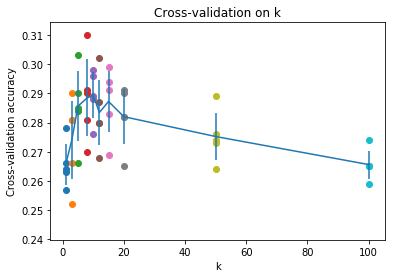

Best k: 10


In [17]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

print('Best k:', k_choices[np.argmax(accuracies_mean)])

In [18]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 10

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 140 / 500 correct => accuracy: 0.280000
